63011212019 อาทิตย์ ทวีบท รหัสวิชา 1204317 Sec 1 (05/10/2565)

In [21]:
import pandas as pd
import csv 

#ข้อมูลเป็นแนวนอน ทำให้เป็นคอลัม

with open('/content/drive/MyDrive/DS/datalastweek/Market_Basket.csv') as f:
  read = csv.reader(f) #แปลงเป็นlist
  dataset = list(read)

dataset[0:10]

[['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food']]

In [23]:

from mlxtend.preprocessing import TransactionEncoder

tr_en = TransactionEncoder()
encoded = tr_en.fit(dataset).transform(dataset)
df = pd.DataFrame(encoded, columns=tr_en.columns_) #ทำให้เป็นคอลัม

df.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [24]:
from mlxtend.frequent_patterns import apriori, association_rules

freq = apriori(df, min_support=0.05, use_colnames=True) #คือ item ที่มากกว่า 0.05 ทั้วแดี่ยว และ เช็ท
freq 

,support,itemsets
0,0.087200,(burgers)
1,0.081067,(cake)
2,0.060000,(chicken)
3,0.163867,(chocolate)
4,0.080400,(cookies)
5,0.051067,(cooking oil)
6,0.179733,(eggs)
7,0.079333,(escalope)
8,0.170933,(french fries)
9,0.063200,(frozen smoothie)


In [25]:
rules = association_rules(freq, metric='confidence', min_threshold=0.1)  #A ------> B ค่า confidence
rules #ดูการซื้อขายินค้าว่าซื้อสอนค้านี้แล้ว เขาจะซื้ออะไรไปด้วย

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(mineral water),(chocolate),0.238267,0.163867,0.052667,0.221041,1.348907,0.013623,1.073398
1,(chocolate),(mineral water),0.163867,0.238267,0.052667,0.321400,1.348907,0.013623,1.122506
2,(mineral water),(eggs),0.238267,0.179733,0.050933,0.213766,1.189351,0.008109,1.043286
3,(eggs),(mineral water),0.179733,0.238267,0.050933,0.283383,1.189351,0.008109,1.062957
4,(mineral water),(spaghetti),0.238267,0.174133,0.059733,0.250699,1.439698,0.018243,1.102184
5,(spaghetti),(mineral water),0.174133,0.238267,0.059733,0.343032,1.439698,0.018243,1.159468


In [26]:
data = pd.read_csv('/content/drive/MyDrive/DS/datalastweek/Iris.csv')
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
data_x = data.values[:,:4] #แอตทิบิว
data_y = data.values[:,4] #ผลเฉลย
data_y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [28]:
from logging import critical
#สร้าง DecisionTree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='gini')
dt.fit(data_x, data_y)

DecisionTreeClassifier()

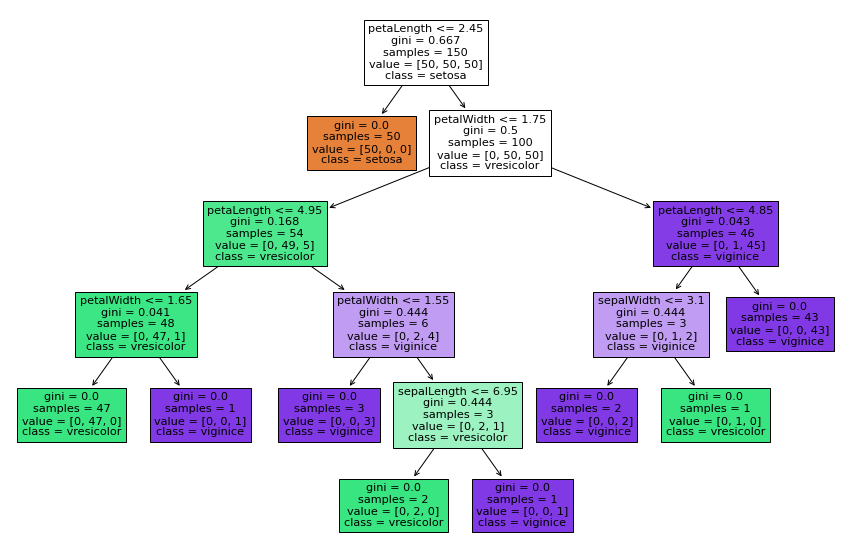

In [31]:
from tables import table
from sklearn import tree
from matplotlib import pyplot as plt

target = ['setosa', 'vresicolor', 'viginice']
attribute = ['sepalLength', 'sepalWidth', 'petaLength', 'petalWidth']

fig = plt.figure(figsize=(15,10))
tree.plot_tree(dt, class_names=target, feature_names=attribute,filled=True)
plt.show()



In [33]:
#พยากรณ์

x = [[1.9, 3.0, 0.4, 1.4]]
label = dt.predict(x)
print(label)

['Iris-setosa']
